In [1]:
import pandas as pd

In [2]:
table = pd.read_csv('codons.csv', index_col=0, header=None)

In [3]:
def getCodons(aa):
    return list(table.loc[aa,].dropna())

In [4]:
def singleDifference(codons_in):
    codons_out = []
    for i in codons_in:
        for j in range(3):
            for k in ['A', 'U', 'C', 'G']:
                if list(i)[j] != k:
                    codon_to_add = list(i)
                    codon_to_add[j] = k
                    codons_out.append(''.join(codon_to_add))
        codons_out.append(i)
    return codons_out

In [5]:
def getAminoAcid(codons_in):
    aas_out = []
    for i in codons_in:
        if table[table==i].dropna(how='all').index[0] != table[table==i].dropna(how='all').index[-1]:
            return False
        else:
            aas_out.append(table[table==i].dropna(how='all').index[0])
    return aas_out

In [6]:
getAminoAcid(singleDifference(getCodons('M')))

['L', 'L', 'V', 'K', 'T', 'R', 'I', 'I', 'I', 'M']

In [7]:
aas = list(table.index)

In [8]:
[aas.index(i) for i in getAminoAcid(singleDifference(getCodons('M')))]

[9, 9, 17, 8, 16, 14, 7, 7, 7, 10]

In [9]:
import numpy as np

In [35]:
heatmap = np.zeros((21, 21))

In [36]:
for i in range(21):
    aa = aas[i]
    for j in [aas.index(i) for i in getAminoAcid(singleDifference(getCodons(aa)))]:
        heatmap[i, j] = 1

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({'axes.grid': False})

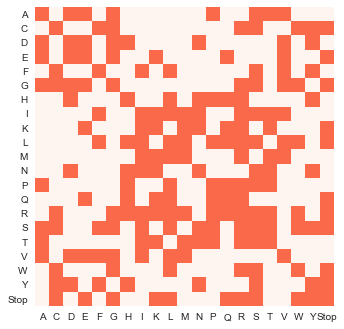

In [53]:
plt.imshow(heatmap, cmap='Reds', vmin=0, vmax=2)
plt.yticks(np.arange(0, 21), aas)
plt.xticks(np.arange(0, 21), aas)
plt.savefig('mutational_space.png', dpi=300)
plt.show()

In [46]:
np.sum(heatmap) / (21**2)

0.43310657596371882

In [47]:
heatmap_double = np.zeros((21, 21))

In [48]:
for i in range(21):
    aa = aas[i]
    for j in [aas.index(i) for i in getAminoAcid(singleDifference(singleDifference(getCodons(aa))))]:
        heatmap_double[i, j] = 1

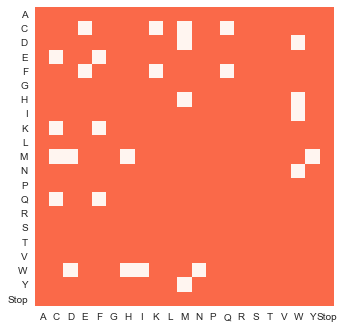

In [56]:
plt.imshow(heatmap_double, cmap='Reds', vmin=0, vmax=2)
plt.yticks(np.arange(0, 21), aas)
plt.xticks(np.arange(0, 21), aas)
plt.savefig('mutational_space_double.png', dpi=300)
plt.show()

In [51]:
np.sum(heatmap_double) / (21**2)

0.93650793650793651